# Import Required Libraries
Import the necessary libraries, including pathlib, matplotlib, os, and cgshop2025_pyutils.

   >[!NOTE]
   >
   >Notebook requires the `ipywidgets` and `cgshop2025_pyutils` library for python, it is necessary to install with next line command:
   >
   >```bash
   >pip install ipywidgets
   >pip install cgshop2025_pyutils
   >```

In [105]:
# Import the necessary libraries
from pathlib import Path
from matplotlib import pyplot as plt
import ipywidgets as widgets

# Import specific classes and functions from cgshop2025_pyutils
from cgshop2025_pyutils import (
    DelaunayBasedSolver,
    InstanceDatabase,
    ZipSolutionIterator,
    ZipWriter,
    verify,
    visualization
)

# Locate the Instances
Locate the instances using the InstanceDatabase class from cgshop2025_pyutils.

In [106]:
# Locate the instances using the InstanceDatabase class from cgshop2025_pyutils
idb = InstanceDatabase("example_instances/")

# Display the number of instances found
print(f"Number of instances found: {sum(1 for e in idb)}")

Number of instances found: 40


# Delete Existing Solution Zip File
Check if the solution zip file already exists and delete it if it does.

In [107]:
# Check if the solution zip file already exists and delete it if it does
if Path("example_solutions.zip").exists():
    Path("example_solutions.zip").unlink()
    print("Existing solution zip file deleted.")
else:
    print("No existing solution zip file found.")

Existing solution zip file deleted.


# Compute Solutions for All Instances
Compute solutions for all instances using the provided DelaunayBasedSolver and store them in a list.

In [108]:
# Compute solutions for all instances using the provided DelaunayBasedSolver and store them in a list
solutions = []  # Initialize an empty list to store solutions

# Iterate over each instance in the InstanceDatabase
for instance in idb:
    uid = instance.instance_uid  # Get the unique identifier for the instance
    points_x = instance.points_x  # Get the x-coordinates of the points in the instance
    points_y = instance.points_y  # Get the y-coordinates of the points in the instance
    num_points = instance.num_points  # Get the number of points in the instance
    
    # Print instance details for debugging purposes
    print(f"Instance UID: {uid}")
    print(f"Points X: {points_x}")
    print(f"Points Y: {points_y}")
    print(f"Number of Points: {num_points}")
    
    # Create a solver object for the instance using DelaunayBasedSolver
    solver = DelaunayBasedSolver(instance)
    
    # Compute the solution for the instance
    solution = solver.solve()
    
    # Append the computed solution to the solutions list
    solutions.append(solution)


Instance UID: cgshop2025_examples_simple-polygon-exterior-20_60_5da99fdb
Points X: [5446, 3393, 2803, 2828, 2510, 2228, 2941, 2635, 549, 1615, 1962, 2174, 2173, 2300, 1390, 424, 1106, 3366, 5560, 5981, 6788, 7509, 6907, 7917, 8925, 8719, 9284, 9515, 8495, 8184, 6765, 4401, 3033, 3425, 3734, 2937, 3581, 3840, 5250, 5665, 4681, 5370, 6548, 6995, 8308, 9536, 9214, 9431, 9038, 9277, 9783, 9121, 7880, 7816, 8102, 7588, 7170, 6512, 6641, 6387]
Points Y: [9407, 9383, 9271, 9987, 9506, 9388, 8700, 8057, 7771, 6806, 4788, 3910, 3316, 3040, 3473, 3012, 1172, 964, 1488, 89, 1212, 1038, 256, 164, 118, 731, 1197, 1673, 1653, 2039, 3390, 3766, 3544, 3832, 4365, 7028, 7931, 8281, 7272, 6834, 6655, 6379, 5206, 5038, 4889, 3894, 4554, 5868, 6471, 7858, 8845, 8974, 9061, 7585, 7025, 6704, 7437, 8695, 9017, 9909]
Number of Points: 60
Instance UID: cgshop2025_examples_ortho_20_b099d1fe
Points X: [0, 1000000, 1000000, 998492, 998492, 911972, 911972, 841555, 841555, 807405, 807405, 755435, 755435, 600102, 6

# Write Solutions to Zip File
Write the computed solutions to a new zip file using the ZipWriter class from cgshop2025_pyutils.

In [109]:
# Write the computed solutions to a new zip file using the ZipWriter class from cgshop2025_pyutils
with ZipWriter("example_solutions.zip") as zw:
    for solution in solutions:
        zw.add_solution(solution)
    print("Solutions written to example_solutions.zip")

Solutions written to example_solutions.zip


# Get instance to graph
Generate list of isntances UIDs availables

In [110]:
# Get input
for instance in idb:
    first_instance = instance.instance_uid
    break

w_select = widgets.Select(
    options = [instance.instance_uid for instance in idb],
    value = first_instance,
    description = 'Select UID',
    disabled = False,
    layout = widgets.Layout(width='100%', height='100%')
)
display(w_select)

# TODO: Logic to higligth the selected edge
# # Find solution with iud
# uid_found = False
# sol_edges = []
# for solution in ZipSolutionIterator("example_solutions.zip"):
#     if(solution.instance_uid == uid):
#         uid_found = True
#         sol_edges =solution.edges

# if uid_found == False : 
#     print("uid not found")
#     #exit()
# else:
#     edges_dic = {str(value):key for key,value in zip(range(0,len(sol_edges)),sol_edges)}
#     w_select_edge = widgets.Select(
#     options = edges_dic,
#     index = 0,
#     description = 'Select edge',
#     disabled = False,
#     layout = widgets.Layout(width='100%', height='100%')
#     )
# display(w_select_edge)

Select(description='Select UID', layout=Layout(height='100%', width='100%'), options=('cgshop2025_examples_sim…

Run below code to update with the selected UID 

# Plot Solutions
Plot the solutions using matplotlib and the visualization module from cgshop2025_pyutils.

e_[0]: [3,2] 
e_i: [1, 3]
e_i: [0, 3]
e_i: [8, 3]
e_i: [3, 4]
e_i: [5, 3]
e_i: [3, 59]
e_j: [2, 1]
e_j: [2, 6]
e_j: [5, 2]
e_j: [2, 4]
Triangulation([3, 2], [1, 3], [2, 1])
Triangulation([3, 2], [3, 4], [2, 4])
Triangulation([3, 2], [5, 3], [5, 2])
e_[1]: [2,1] 
e_i: [2, 6]
e_i: [5, 2]
e_i: [2, 4]
e_j: [1, 3]
e_j: [6, 1]
e_j: [1, 0]
e_j: [37, 1]
Triangulation([2, 1], [2, 6], [6, 1])
e_[2]: [1,3] 
e_i: [6, 1]
e_i: [1, 0]
e_i: [37, 1]
e_j: [0, 3]
e_j: [8, 3]
e_j: [3, 4]
e_j: [5, 3]
e_j: [3, 59]
Triangulation([1, 3], [1, 0], [0, 3])
e_[3]: [2,6] 
e_i: [5, 2]
e_i: [2, 4]
e_j: [6, 1]
e_j: [37, 6]
e_j: [6, 36]
e_j: [5, 6]
e_j: [7, 6]
Triangulation([2, 6], [5, 2], [5, 6])
e_[4]: [6,1] 
e_i: [37, 6]
e_i: [6, 36]
e_i: [5, 6]
e_i: [7, 6]
e_j: [1, 0]
e_j: [37, 1]
Triangulation([6, 1], [37, 6], [37, 1])
e_[5]: [0,3] 
e_i: [1, 0]
e_i: [0, 37]
e_i: [38, 0]
e_i: [0, 58]
e_i: [59, 0]
e_i: [57, 0]
e_j: [8, 3]
e_j: [3, 4]
e_j: [5, 3]
e_j: [3, 59]
Triangulation([0, 3], [59, 0], [3, 59])
e_[6]: [1,0] 
e_i

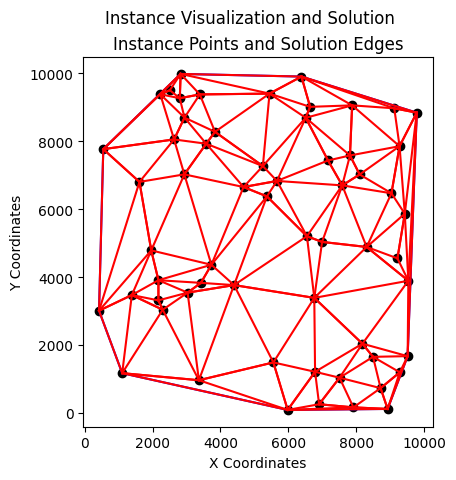

In [111]:
# Plot Solutions

# Init plot
axs = plt.axes()

# Get UID from select list
uid = w_select.value

#  Find instance with uid
instance_selected = 0
uid_found = False
for instance in idb:
    if(instance.instance_uid == uid):
        uid_found = True
        points_x = instance.points_x
        points_y = instance.points_y
        # Plot instance points
        visualization.plot_instance(axs,instance) 
        break

if uid_found == False : 
    print("uid not found")
    #exit()

# Find solution with iud
uid_found = False
sol_edges = []
for solution in ZipSolutionIterator("example_solutions.zip"):
    if(solution.instance_uid == uid):
        uid_found = True
        sol_edges =solution.edges

if uid_found == False : 
    print("uid not found")
    #exit()

# Plot the edges of the solution
for edge in sol_edges:
    axs.plot([points_x[edge[0]], points_x[edge[1]]], [points_y[edge[0]], points_y[edge[1]]], 'r-')
    # TODO: Logic to higlight in blue the selected edge in code block above
    # if(sol_edges[w_select_edge.value] == edge):
    #     axs.plot([points_x[edge[0]], points_x[edge[1]]], [points_y[edge[0]], points_y[edge[1]]], color='blue')
    # else:
    #     axs.plot([points_x[edge[0]], points_x[edge[1]]], [points_y[edge[0]], points_y[edge[1]]], 'r-')
    


triang = [] # Array for triangulations [[e1,e2,e3],[e4,e5,e6], ... [...]]

for i in range(len(sol_edges)): # Iterate over all solution edges
    e_i = [] # Edges matching first vertex 
    e_j = [] # Edges matching second vertex
    print(f"e_[{i}]: [{sol_edges[i][0]},{sol_edges[i][1]}] ") # Print the soluction edge to be comparted with rest of the edges
    for j in range(i+1,len(sol_edges)):
        if(sol_edges[i][0] == sol_edges[j][0] or sol_edges[i][0] == sol_edges[j][1]):
            e_i.append(sol_edges[j])
            
        if(sol_edges[i][1] == sol_edges[j][1] or sol_edges[i][1] == sol_edges[j][0]):
            e_j.append(sol_edges[j])
            
    [print(f"e_i: {ei}") for ei in e_i] # Print all matches for edges i
    [print(f"e_j: {ej}") for ej in e_j] # Print all matches for edges j

    # Compare all vertex in e_i and e_j to find the pair of edges with third vertex coincidence
    for ei in e_i:
        for ej in e_j:
            aux = set(ei) & set(ej) # Intersection operation for sets. Length of the result will be 1 if the list ei and ej shares the value of one of his elements
            if len(aux) == 1: # Check length 
                triang.append([sol_edges[i],ei,ej]) # Add triangulation found on the list
                print(f"Triangulation{sol_edges[i],ei,ej}") # Print triangulation found

#[print(f"Triangulation:{tr}") for tr in triang] # Print all triangulations

# Set titles and labels for the subplots
axs.set_title("Instance Points and Solution Edges")
axs.set_xlabel("X Coordinates")
axs.set_ylabel("Y Coordinates")

# Set the main title for the figure
plt.suptitle("Instance Visualization and Solution")

# Display the plot with the instance and its solution
plt.show()

# Verify Solutions
Verify the solutions using the verify function from cgshop2025_pyutils and print the results.

In [112]:
# Verify Solutions

# Verify the solutions using the verify function from cgshop2025_pyutils and print the results
for solution in ZipSolutionIterator("example_solutions.zip"):
   instance = idb[solution.instance_uid]  # Retrieve the instance corresponding to the solution
   result = verify(instance, solution)  # Verify the solution against the instance
   print(f"{solution.instance_uid}: {result}")  # Print the verification result
   assert not result.errors, "Expect no errors."  # Ensure there are no errors in the verification result

cgshop2025_examples_simple-polygon-exterior-20_60_5da99fdb: num_obtuse_triangles=53 num_steiner_points=0 errors=[]
cgshop2025_examples_ortho_20_b099d1fe: num_obtuse_triangles=11 num_steiner_points=0 errors=[]
cgshop2025_examples_simple-polygon-exterior-20_40_97467655: num_obtuse_triangles=48 num_steiner_points=0 errors=[]
cgshop2025_examples_point-set_40_16c501a5: num_obtuse_triangles=45 num_steiner_points=0 errors=[]
cgshop2025_examples_simple-polygon-exterior-20_250_329290ff: num_obtuse_triangles=244 num_steiner_points=0 errors=[]
cgshop2025_examples_simple-polygon-exterior_40_3df495b2: num_obtuse_triangles=41 num_steiner_points=0 errors=[]
cgshop2025_examples_simple-polygon-exterior-20_80_23272e96: num_obtuse_triangles=89 num_steiner_points=0 errors=[]
cgshop2025_examples_simple-polygon-exterior_60_82e60438: num_obtuse_triangles=60 num_steiner_points=0 errors=[]
cgshop2025_examples_simple-polygon-exterior-20_150_b988b15c: num_obtuse_triangles=169 num_steiner_points=0 errors=[]
cgsho

Esto es una nueva atualización 